In [1]:
import spot
from spot.seminator import seminator
spot.setup()

The `seminator()` function can also perform complementation of automata.  This works by converting the input into a semi-deterministic TBA, and then applying the NCSB construction, that produces a TBA.  Two versions of the semi-deterministic construction are available:
  - `"spot"` is the implementation available in Spot, which a a transition-based adaptation of the NCSB construction described in [this TACAS'16 paper](http://www.fi.muni.cz/~xstrejc/publications/tacas2016coSDBA_preprint.pdf)
  - `"pldi"` is a variant described in [section 5 of this PLDI'18 paper](http://www.fit.vutbr.cz/~lengal/pub/pldi18-semidet-buchi-compl.pdf), implemented in Seminator for transition-based automata.
  
If `complement=True` is passed to the `seminator()` function, the smallest output produced by these two construction is used.  To force one construction, use `complement="spot"` or `complement="pldi"`.

The `postproc_comp` argument controls whether the result of the NCSB complementations should be postprocessed or not.  It default to `True` unless the `pure=True` option is given.

Here is a case where the output where the `"spot"` variant is better than the `"pldi"` one (after simplification of the result):

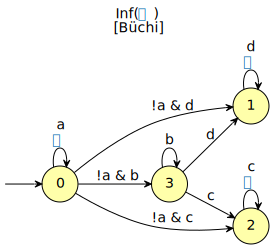

In [2]:
f = spot.formula('G(a | (b U (Gc | Gd)))')
aut = f.translate(); aut

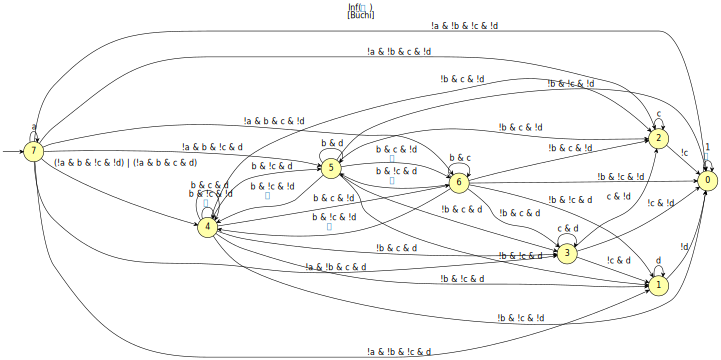

In [3]:
neg1 = seminator(aut, complement="spot"); neg1

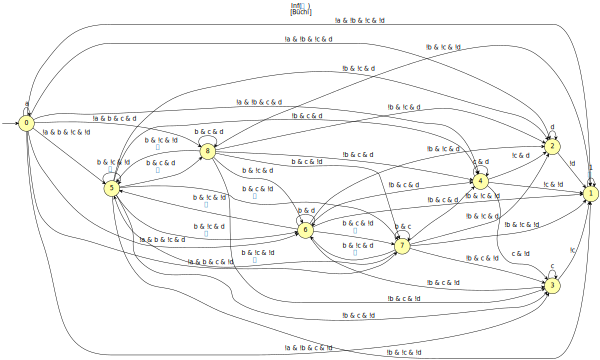

In [4]:
neg2 = seminator(aut, complement="pldi"); neg2

In [5]:
nf = spot.formula_Not(f)
assert neg1.equivalent_to(nf)
assert neg2.equivalent_to(nf)

Here is a case where it is the opposite:

In [6]:
f2 = spot.formula('G(a | X(!a | (a U (a & !b & X(a & b)))))')

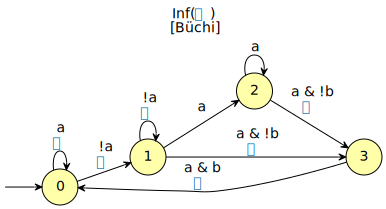

In [7]:
aut2 = f2.translate(); aut2

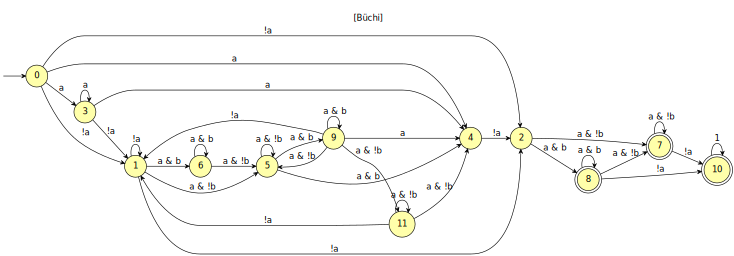

In [8]:
neg3 = seminator(aut2, complement="spot"); neg3

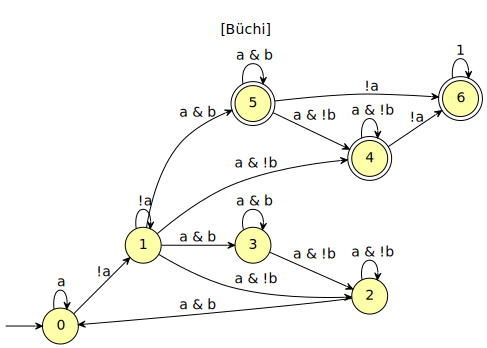

In [9]:
neg4 = seminator(aut2, complement="pldi"); neg4

In [10]:
nf2 = spot.formula_Not(f2)
assert neg3.equivalent_to(nf2)
assert neg4.equivalent_to(nf2)